In [117]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import MeanShift

In [72]:
data_raw = pd.read_csv('data/checkins.dat', sep='|', skipinitialspace=True)
data_raw.head()

,id,user_id,venue_id,latitude,longitude,created_at
0,---------+---------+----------+---------------...,NaN,NaN,NaN,NaN,NaN
1,984301,2041916.0,5222.0,NaN,NaN,2012-04-21 17:39:01
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
3,984315,1764391.0,5222.0,NaN,NaN,2012-04-21 17:37:18
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43


In [77]:
n_samples = 100_000
data_raw.columns = data.columns.map(lambda column: column.strip())
data = data_raw.iloc[data_raw['latitude'].dropna().index]
data.reset_index(drop=True, inplace=True)

print(f'Shape after cleaning: {data.shape}')
data = data.iloc[:n_samples]
print(f'Shape after subsampling: {data.shape}')

data.head()

Shape after cleaning: (396634, 6)
Shape after subsampling: (100000, 6)


,id,user_id,venue_id,latitude,longitude,created_at
0,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
1,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
2,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
3,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
4,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18


In [83]:
X = data[['latitude', 'longitude']]

In [86]:
%%time

clustering = MeanShift(bandwidth=0.1)
labels = clustering.fit_predict(X)

Wall time: 2min 25s


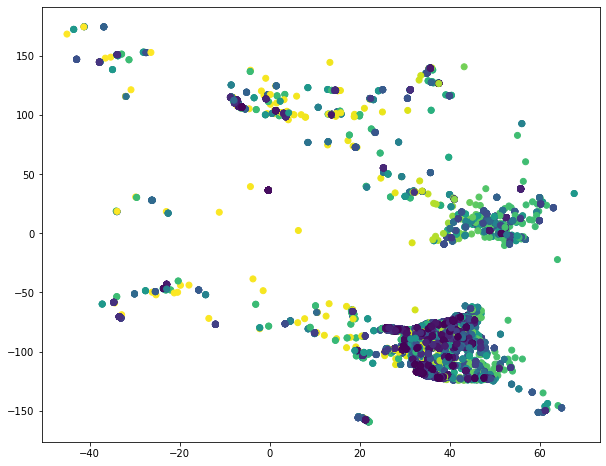

In [99]:
plt.figure(figsize=(10, 8))
plt.scatter(X.latitude, X.longitude, c=labels);

In [100]:
vc = pd.Series(labels).value_counts()
good = vc[vc > 15].index

In [105]:
clustered = pd.concat([X, pd.Series(labels, name='cluster')], axis=1)

clustered = clustered[clustered.cluster.isin(good)]

In [108]:
clustered.shape

(90862, 3)

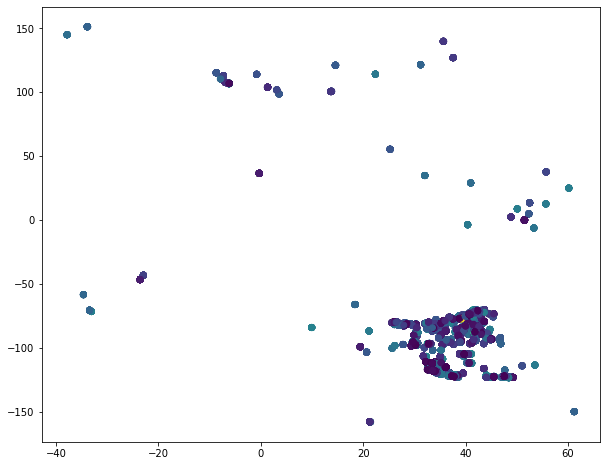

In [109]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered.latitude, clustered.longitude, c=clustered.cluster);

In [110]:
centers = clustering.cluster_centers_[good]

In [112]:
centers[:5]

array([[  40.7177164 ,  -73.99183542],
       [  33.44943805, -112.00213969],
       [  33.44638027, -111.90188756],
       [  37.68868157, -122.40933037],
       [  41.87824378,  -87.62984336]])

In [114]:
pd.DataFrame(centers).to_csv('data/centers.csv', index=False, header=False)

In [125]:
offices = pd.read_csv('data/offices.csv', usecols=[0, 1], header=None).values

In [136]:
dists = np.sum(np.abs(centers[:, None, :] - offices[None, :, :]), axis=2)
dists_min = dists.min(axis=1)
closest = dists_min.argsort()[:20]

closest

array([397, 366, 406,  57,  52,  30, 146, 314,  86, 121, 307,  39,  29,
        11, 285,  34, 162,  58, 114,  53], dtype=int64)

In [143]:
answer = centers[closest[0]]
answer

array([-33.86063043, 151.20477593])

In [150]:
np.savetxt('data/answer.txt', answer, fmt='%.8f', newline=' ')